<a href="https://github.com/theonaunheim">
    <img style="border-radius: 100%; float: right;" src="static/strawberry_thief_square.png" width=10% alt="Theo Naunheim's Github">
</a>

<br style="clear: both">
<hr>
<br>

<h1 align='center'>Series Part 2 Solutions</h1>

<br>

<div style="display: table; width: 100%">
    <div style="display: table-row; width: 100%;">
        <div style="display: table-cell; width: 50%; vertical-align: middle;">
            <h1 align="center"> $W=-\Delta PE$ </h1>
        </div>
        <div style="display: table-cell; width: 10%">
        </div>
        <div style="display: table-cell; width: 40%; vertical-align: top;">
            <blockquote>
                <p style="font-style: italic;">"Diligence is the mother of good fortune."</p>
                <br>
                <p>-Miguel de Cervantes</p>
            </blockquote>
        </div>
    </div>
</div>

<br>

<hr>

# Problem 1

* Import numpy and pandas as `np` and `pd`.


* Create a series from the './data/height_in_feet.csv' file using `pd.read_csv()`, and assign it to variable `height`.


* Display the first 10 items of `height` using `head()`.


* In a new cell, round each height to the nearest foot using the `round()` method and store the result to a variable called `rounded`.


* Display the first 10 items of `rounded` using `head()`.

---

### Double click for hints.

---

<div hidden=true>

**Hint**: Again, you will have to use `header=None` and `squeeze=True` to coerce your CSV to a Series.

**Hint**: `head()` defaults to 5, so you will need to supply a value of 10 as an argument.
    
</div>

In [1]:
# Import under aliases
import numpy as np
import pandas as pd

# Create a height Series.
height = pd.read_csv(
    './data/height_in_feet.csv', 
    header=None, 
    squeeze=True
)

# Display the first 10 items of height
height.head(10)

0    5.57
1    5.70
2    6.12
3    5.90
4    5.87
5    5.45
6    5.54
7    5.84
8    6.24
9    5.96
Name: 0, dtype: float64

In [2]:
# Round the height series and store in rounded.
rounded = height.round()

# Display rounded first 10 items
rounded.head(10)

0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
5    5.0
6    6.0
7    6.0
8    6.0
9    6.0
Name: 0, dtype: float64

# Problem 2


* Get the count of each value in  in `rounded`, save it to a variable called `counts`, and display it.


* In the next cell, sort `counts` from tallest to shortest and store the result in a variable called `sorted_counts`.


* Print the number of people that are approximately 5 feet tall.


* Display `sorted_counts`.

---

### Double click for hints.

---

<div hidden=true>

**Hint**: Use `value_counts()` to get the count of values.

**Hint**: when using `loc[]` to get the number of people that are 5 feet tall, you can use `5`, but it would be better to use `5.0` as that's what's in the index.

**Hint**: Use `sort_index()` as opposed to `sort_values()` to sort by index values. You will need to pass an `ascending=False` argument to avoid the default.

</div>

In [3]:
# Get the counts of the rounded values and assign to counts.
counts = rounded.value_counts()
counts

6.0    681
5.0    318
7.0      1
Name: 0, dtype: int64

In [4]:
# Get the counts of the rounded values and assign to counts.
sorted_counts = counts.sort_index(ascending=False)

# Print number of people that are 5 feet tall.
print('Number of people 5 feet tall: ', sorted_counts.loc[5.0])

# Display
sorted_counts

Number of people 5 feet tall:  318


7.0      1
6.0    681
5.0    318
Name: 0, dtype: int64

# Problem 3

A Pandas koan ...

The [canonical solution](https://stackoverflow.com/questions/23451244/how-to-zscore-normalize-pandas-column-with-nans) for getting Z scores in Pandas looks something like this:

    number_series = pd.Series([0, 1, 2, 3, 4, 5, 4, 3, 2, 1])
    z_scores    = (number_series - number_series.mean()) / number_series.std()

<br>

* How does `(number_series - number_series.mean()) / number_series.std()` work?

<br>


**Hint**: a [Z-score](https://en.wikipedia.org/wiki/Standard_score) is essentially the number of standard deviations from the mean.

The Z-score for each observation is calculated as:

## $z={(x-\mu) \over \sigma }$

where: 

* **x** is the observation

* **$\mu$** is the mean of the population.

* **$\sigma$** is the standard deviation of the population.

---

### Double click for hints.

---

<div hidden=true>

**Hint**: it has to do with the difference in behavior between vectors and scalars.

**Hint**: `(raw_numbers - raw_numbers.mean()) / raw_numbers.std()` two of these are scalars and one is a Series. Try breaking it into more steps/intermediates if unclear.
    
</div>

In [5]:
# Displaying the series
number_series = pd.Series([0, 1, 2, 3, 4, 5, 4, 3, 2, 1])
number_series

0    0
1    1
2    2
3    3
4    4
5    5
6    4
7    3
8    2
9    1
dtype: int64

In [6]:
# This works because the results of .mean() and std() are scalars, while raw_numbers is a Series.
# Recall that when you do an operation with a scalar, it is done to each item in the Series.
number_series * 10

0     0
1    10
2    20
3    30
4    40
5    50
6    40
7    30
8    20
9    10
dtype: int64

In [7]:
# Both mean() and std() give us back scalars
mean_scalar  = round(number_series.mean(), 1)
stdev_scalar = round(number_series.std() , 1)

print(f'Mean is {mean_scalar} and stdev is {stdev_scalar}')

Mean is 2.5 and stdev is 1.6


In [8]:
# Which means our operations are basically this:
print(f'This means our formula:\n\n\traw_numbers - raw_numbers.mean() / raw_numbers.std()\n')

# Is functionally equivalent to
print(f'is the same as:\n\n\t (raw_numbers - {mean_scalar}) / {stdev_scalar}\n')

# Is functionally equivalent to
print(f'is the same as:\n\n\t raw_minus_mean / {stdev_scalar}\n')

This means our formula:

	raw_numbers - raw_numbers.mean() / raw_numbers.std()

is the same as:

	 (raw_numbers - 2.5) / 1.6

is the same as:

	 raw_minus_mean / 1.6



In [9]:
# So breaking this down ... we subtract the mean from the Series, yielding a new Series.
number_minus_mean_series = number_series - mean_scalar
number_minus_mean_series

0   -2.5
1   -1.5
2   -0.5
3    0.5
4    1.5
5    2.5
6    1.5
7    0.5
8   -0.5
9   -1.5
dtype: float64

In [10]:
# We then divide that difference Series by another scalar yielding a new Series.
z_score_series = number_minus_mean_series / stdev_scalar
z_score_series

0   -1.5625
1   -0.9375
2   -0.3125
3    0.3125
4    0.9375
5    1.5625
6    0.9375
7    0.3125
8   -0.3125
9   -0.9375
dtype: float64

# Problem 4


* Load '.data/lob_characters.csv' using `squeeze=True` into a variable called `lob`. Display the first 5 items.


* In a new cell, determine whether each character in the Series is in the list `['Gaoler', 'Jimbo', 'Judith Escariot']` and save the resulting boolean Series into `character_bix`. Display the first 5 items.


* In a new cell, use lob's `loc[]` attribute to get all the entries that are True in `character_bix`.


* In a new cell, check whether each item in `lob` is NA/null. Assign the result to `null_bix` and display the first 5 items.


* In a new cell, check whether each item in `lob` is equal to `np.NaN` using the equality operator (`==`). Save the result to `useless_bix` and display the first 5 items. Is this different than `null_bix`? Why?


* In a new cell, replace all `np.NaN` values with the string 'Unknown' and save the resulting Series to `filled`. Display the first 5 items.


* In a new cell, drop all NA values and assign the result to `dropped_na`. Then drop the duplicates from `dropped_na` and assign the resulting Series to `dropped_na_and_dupes`. Display the final Series.


* In a new cell, save `dropped_na_and_dupes` to an Excel file with no index.

---

### Double click for hints.

---

<div hidden=true>

**Hint**: Use the `isin()` method to determine if each element of a Series falls within a particular list or Series. Your list or Series will be the first (and usually only) argument.

**Hint**: Use `isnull()` to find which items of a Series are null.

**Hint**: Use `fillna()` to fill NA values with a new value (your new value will be the argument to `fillna()`.

**Hint**: Use `dropna()` to drop NaN values.

**Hint**: Use `drop_duplicates()` to drop duplicate values.

**Hint**: Use `to_excel()` to save to an Excel file (remember to use a '.xlsx' suffix on your filename).
                                                             
</div>

In [11]:
# Load data and display
lob = pd.read_csv('./data/lob_characters.csv', squeeze=True)
lob.head()

0                    Brian
1                      NaN
2    Centurion of the Yard
3                   Gaoler
4                      NaN
Name: characters, dtype: object

In [12]:
# Check whether each character is in the list ['Gaoler', 'Jimbo', 'Judith Escariot']
character_bix = lob.isin(['Gaoler', 'Judith Escariot'])
character_bix.head()

0    False
1    False
2    False
3     True
4    False
Name: characters, dtype: bool

In [13]:
# Get a Series entirely composed of items in character_gix
lob.loc[character_bix]

3              Gaoler
8     Judith Escariot
14             Gaoler
Name: characters, dtype: object

In [14]:
# Check whether each item in the Series is null.
null_bix = lob.isnull()
null_bix.head()

0    False
1     True
2    False
3    False
4     True
Name: characters, dtype: bool

In [15]:
# Check whether each item is equal to NaN
useless_bix = lob == np.NaN

# It's different becausee np.NaN is not equal to anything, including itself!
# You should use specialized functions to find NaN values.
print(np.NaN == np.NaN)
useless_bix.head()

False


0    False
1    False
2    False
3    False
4    False
Name: characters, dtype: bool

In [16]:
# Fill NA items with "Unknown"
filled = lob.fillna('Unknown')
filled.head()

0                    Brian
1                  Unknown
2    Centurion of the Yard
3                   Gaoler
4                  Unknown
Name: characters, dtype: object

In [17]:
# Drop NA values
dropped_na = lob.dropna()

# Drop duplicates from dropped_na
dropped_na_and_dupes = dropped_na.drop_duplicates()

# Display
dropped_na_and_dupes

0                     Brian
2     Centurion of the Yard
3                    Gaoler
5         Harry the Haggler
6                  Ex-Leper
7                   Gregory
8           Judith Escariot
9        Simon the Holy Man
10           Pontius Pilate
11                 Matthias
Name: characters, dtype: object

In [18]:
# Write to Excel
dropped_na_and_dupes.to_excel('./data/dropped_na_and_dupes.xlsx', index=False)

# Problem 5

* Load './data/mixed_bag.csv' using the `squeeze` keyword and assign the result to `mixed`. Display the Series.


* In a new cell, show `mixed`'s datatype.


* In a new cell, convert `mixed` to numeric values in a fault tolerant manner. Write the result to `mixed_numeric`. Display.


* In a new cell, convert `mixed` to datetime values in a fault tolerant manner. Write the results to `mixed_datetime`. Display.


* In a new cell, convert `mixed_numeric` to a string and save the result to `mixed_string`. Display.

---

### Double click for hints.

---

<div hidden=true>

**Hint**: the `dtype` attribute will give you the original datatype.

**Hint**: the best way to convert to numerics in a fault tolerant manner is `pd.to_numeric()` with an `errors='coerce'` argument.

**Hint**: the best way to convert to datetimes in a fault tolerant manner is `pd.to_datetime()` with an `errors='coerce'` argument.

**Hint**: string conversion can be accomplished relatively easily using `astype(str)`.
    
</div>

In [19]:
# Load Series
mixed = pd.read_csv('./data/mixed_bag.csv', squeeze=True)
mixed

0    2018-01-01
1             4
2           2.0
3    2019-01-01
4    12/31/2015
5           2.8
6         hola!
7           2.9
8           NaN
Name: hot_mess, dtype: object

In [20]:
# Show dtype
mixed.dtype

dtype('O')

In [21]:
# Convert to numeric
mixed_numeric = pd.to_numeric(mixed, errors='coerce')
mixed_numeric

0    NaN
1    4.0
2    2.0
3    NaN
4    NaN
5    2.8
6    NaN
7    2.9
8    NaN
Name: hot_mess, dtype: float64

In [22]:
# Convert to datetime
mixed_datetime = pd.to_datetime(mixed, errors='coerce')
mixed_datetime

0   2018-01-01
1          NaT
2          NaT
3   2019-01-01
4   2015-12-31
5          NaT
6          NaT
7          NaT
8          NaT
Name: hot_mess, dtype: datetime64[ns]

In [23]:
# Convert numeric to string
mixed_string = mixed_numeric.astype(str)
mixed_string

0    nan
1    4.0
2    2.0
3    nan
4    nan
5    2.8
6    nan
7    2.9
8    nan
Name: hot_mess, dtype: object

# Problem 6

* Read the data from './data/morse.csv' using 'character' as an index column and the `squeeze` keyword argument and assign the data to `morse`. Display the first 5 items.


* In a new cell, reset the index to a simple integer index without converting to a Dataframe and assign the data to `reset_morse`. Display the first 5 items.


* In a new cell reindex `reset_morse` using the original index of `morse`. Assign the result to `morse_again` and display the first 5 items.


* In a new cell, get a 25% sample of morse and assign it to `sample`. Get the index values of `sample` and assign them to `sample_ix`.


* In a new cell, drop the `sample_ix` items from `morse`, and display the first 5 items of the resulting Series.

---

### Double click for hints.

---

<div hidden=true>

**Hint**: use `index_col='character'` to index your Series on the 'character' column.

**Hint**: use `reset_index(drop=True)` to reset your Series without converting to a DataFrame.

**Hint**: use `reindex()`  on `morse_again` with an argument of `morse.index` to reset the index based on `morse`'s index.

**Hint**: use `sample(frac=.25)` to get a 25% sample, and use `sample.index.values` to get the index values of that sample.

**Hint**: use `drop()` to drop index items from a Series.

</div>

In [24]:
# Load the morse csv using 'character' as an index column
morse = pd.read_csv('./data/morse.csv', index_col='character', squeeze=True)
morse.head()

character
"    . _ . . _ .
'    . _ _ _ _ .
(      _ . _ _ .
)    _ . _ _ . _
+      . _ . _ .
Name: morse_representation, dtype: object

In [25]:
# Reset index
reset_morse = morse.reset_index(drop=True)
reset_morse.head()

0    . _ . . _ .
1    . _ _ _ _ .
2      _ . _ _ .
3    _ . _ _ . _
4      . _ . _ .
Name: morse_representation, dtype: object

In [26]:
# Set the index to 'morse_representation', effectively inverting our
morse_again = reset_morse.reindex(morse.index)
morse_again.head()

character
"    NaN
'    NaN
(    NaN
)    NaN
+    NaN
Name: morse_representation, dtype: object

In [27]:
# Get a random sample of our morse characters.
sample = morse.sample(frac=.25)

# Convert that sample into a series of index values
sample_ix = sample.index.values

In [28]:
# Use those sample index values to drop the sample from the morse Series
morse.drop(sample_ix).head()

character
'    . _ _ _ _ .
(      _ . _ _ .
)    _ . _ _ . _
+      . _ . _ .
,    _ _ . . _ _
Name: morse_representation, dtype: object

# Problem 7


* Load the data from './data/morse.csv' using `pd.read_csv()` with 'character' as an index column and `squeeze=True`. Assign the resulting Series to the variable `morse`.


* Display the morse object using `loc[]` from index 'A' to index 'B'.


* In a new cell, create a list from the string 'The rain in Spain falls mainly on the plain.' with one letter per list element. Store that list in variable `string_list`. Then feed this list into a Series, which you should call `string_series`. Display the first 10 items of this series.


* Define a function called `make_uppercase` that takes a single letter, and returns the upper case version of that letter. Then use the `map()` method of your string series to map your `make_uppercase()` function. Store the result to `function_mapped` and display the first 10 items.


* Then take your `function_mapped` series and use `map()` again, this time mapping values using a Series. Save the result to `series_mapped` and display the first 10 items.

---

### Double click for hints.

---

<div hidden=true>

**Note**: to specify an index column, use an `index_col` argument (e.g. `index_col='character'`)

**Note**: to split a string into a list, simply use the list constructor `list('Your string here')`.

**Note**: you are first creating a new Series based on a function mapping. You are then creating a new Series based on a  translation-table-like Series mapping.

**Note**: don't worry about the NaNs. Morse code does not have a representation for spaces. Because there's nothing to map, pandas fills these values with NaN.

</div>

In [29]:
# Load the character to morse code mapping
morse = pd.read_csv('./data/morse.csv', index_col='character', squeeze=True)

# Display letters A through Z.
morse.loc['A': 'Z']

character
A        . _
B    _ . . .
C    _ . _ .
D      _ . .
E          .
F    . . _ .
G      _ _ .
H    . . . .
I        . .
J    . _ _ _
K      _ . _
L    . _ . .
M        _ _
N        _ .
O      _ _ _
P    . _ _ .
Q    _ _ . _
R      . _ .
S      . . .
T          _
U      . . _
V    . . . _
W      . _ _
X    _ . . _
Y    _ . _ _
Z    _ _ . .
Name: morse_representation, dtype: object

In [30]:
# Create a list from the string, "The rain in Spain falls mainly on the plain."
string_list = list('The rain in Spain falls mainly on the plain.')

# Create a Series from that list
string_series = pd.Series(string_list)

# Display first 10.
string_series.head(10)

0    T
1    h
2    e
3     
4    r
5    a
6    i
7    n
8     
9    i
dtype: object

In [31]:
# Define a function to capitalize something
def make_uppercase(letter):
    return letter.upper()


# Map the make_uppercase function to the string and save to upper_string
function_mapped = string_series.map(make_uppercase)

# Display first 10
function_mapped.head(10)

0    T
1    H
2    E
3     
4    R
5    A
6    I
7    N
8     
9    I
dtype: object

In [32]:
# Map the morse code Series
series_mapped = function_mapped.map(morse)

# Display first 10
series_mapped.head(10)

0          _
1    . . . .
2          .
3        NaN
4      . _ .
5        . _
6        . .
7        _ .
8        NaN
9        . .
dtype: object

# Problem 8


* Load './data/salaries.csv' using `pd.read_csv()` and assign it to a variable called `salaries`. Load './data/professions.csv' and assign it to a cariable called `professions`.


* In a new cell, show the first 5 elements of `professions`.


* In a new cell, show the first 5 elements of `salaries`. What do you see?


* In a new cell, use `groupby()` to group `salaries` by `professions`. Assign the result to a variable called `gb`.


* In a new cell, get the median of your groupby object, and sort the values.


* In a new cell, get the count of your groupby object and sort the values.

---

### Double click for hints.

---

<div hidden=true>

**Hint**: you'll again have to use the `squeeze=True` argument for both Series.

**Hint**: you group one Series by another by using the `groupby()` method and passing the Series used for grouping to that method. For details, see the previous notebook.

**Hint**: the median of your groupby object is unsurprisingly obtained by using the `median()` method.

**Hint**: the count of your groupby object can be found using `size()`.
    
</div>

In [33]:
# Load our Series.
salaries    = pd.read_csv('./data/salaries.csv', squeeze=True)
professions = pd.read_csv('./data/professions.csv', squeeze=True)

In [34]:
# Show professions
professions.head()

0    Soldier
1     Tailor
2    Soldier
3     Tailor
4    Soldier
Name: profession, dtype: object

In [35]:
# Show salaries. There is no variablility around soldier salaries.
salaries.head()

0    40000.00
1    35970.85
2    40000.00
3    59732.74
4    40000.00
Name: salary, dtype: float64

In [36]:
# Group salaries by profession
gb = salaries.groupby(professions)

In [37]:
# Get the median salary
gb.median().sort_values()

profession
Tinker     34987.51
Soldier    40000.00
Tailor     46427.35
Spy        71137.06
Name: salary, dtype: float64

In [38]:
# Get the size of each group.
gb.size().sort_values()

profession
Spy         50
Tailor      87
Tinker     168
Soldier    695
Name: salary, dtype: int64

# Problem 9


* Import matplotlib then import matplotlib.pyplot as `plt`.


* Set up Matplotlib to plot inline intead of in a separate window.


* Tell matplotlib to use 'fivethirtyeight' styling.


* In a new cell, plot a histogram of `height`. Use a `bins=25` argument.


* In a new cell, create a horizontal bar graph of `counts`. Pass a `title='Primitive Bar Chart'` and a `figsize=(10,10)` argument.


* In a new cell, Create a pie chart of `counts` with a `colors=['teal', 'gray', 'white']` argument. Save a .png of the graph to './data/pie_chart.png'.

---

### Double click for hints.

---

<div hidden=true>

**Hint**: `%matplotlib inline` is the cell magic used to show a graph in the notebook.

**Hint**: `matplotlib.style.use('fivethirtyeight')` will set up fivethirtyeight styling.

**Hint**: horizontal graphs can be generated with `plot.barh()`. Pie charts can be done via `plot.pie()`. Histograms can be created with `plot.hist()`

**Hint**: you can output your most recent figure using `plt.savefig()`.

**Hint**: you will want to plot each plot in a separate cell so you don't overwrite your previous graphs.
    
</div>

In [39]:
# Use cell magic to print inline
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('fivethirtyeight')

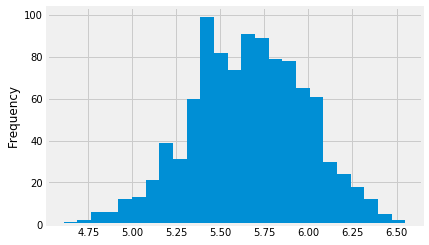

In [40]:
# Histogram with 25 bins.
height.plot.hist(bins=25)

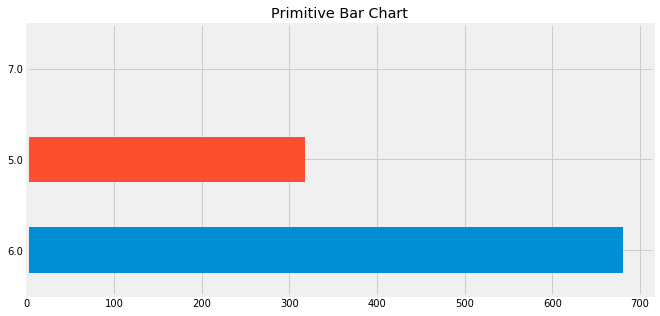

In [41]:
# Plot counts as horizontal bar chart
counts.plot.barh(
    title='Primitive Bar Chart', 
    figsize=(10, 5)
)

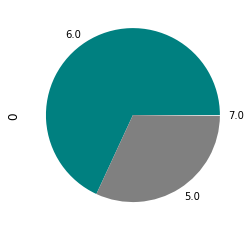

In [42]:
# Plot counts as a pie chart.
counts.plot.pie(colors=['teal', 'gray', 'white'])

# Output to pie_chart.png
plt.savefig('./data/pie_chart.png')

# Problem 10


* Load the data from './data/unemployment.csv' using `squeeze=True` and `index_col='month'` arguments. Assign the data to a `unemployment`. Display the first 10 items of `unemployment`.


* In a new cell, create a rolling object with a window of 12 observations and assign it to the name `rolling`.


* In a new cell, get the rolling mean of your `rolling` object and assign it to `rmean`. Plot `rmean` using the default line chart and then display the last 12 items of the `rmean` series.


* In a new cell, get the rolling max of your `rolling` object and assign it to `rmax`. Plot `rmax` using the default line chart and then display the last 12 items of the `rmax` series.


* Take the `rmean` series and write it to './data/rolling.csv'.

---

### Double click for hints.

---

<div hidden=true>

**Hint**: `index_col` allows you to specify which column will be used as an index for your Series/DataFrame.

**Hint**: `rolling()` takes the number of observations used for the window as it's first argument. E.G. if you have a Series indexed on month, and you want the rolling observation for the previous 18 months, you would do `rolling = old_series.rolling(18)`. 

**Hint**: a method from a rolling object will give you a new Series.

**Hint**: `plot()` defaults to a basic line chart, so you can just plot without any arguments.

**Hint**: even if you `plot()`, you can still display the last item of the cell.
    
</div>

In [43]:
# Load unemployment data
unemployment = pd.read_csv('./data/unemployment.csv', squeeze=True, index_col='month')
unemployment.head(10)

month
2000-01    4.0
2000-02    4.1
2000-03    4.0
2000-04    3.8
2000-05    4.0
2000-06    4.0
2000-07    4.0
2000-08    4.1
2000-09    3.9
2000-10    3.9
Name: unemployment_rate, dtype: float64

In [44]:
# Rolling
rolling = unemployment.rolling(window=12)

month
2017-11    4.400000
2017-12    4.350000
2018-01    4.291667
2018-02    4.241667
2018-03    4.208333
2018-04    4.166667
2018-05    4.125000
2018-06    4.100000
2018-07    4.066667
2018-08    4.025000
2018-09    3.983333
2018-10    3.950000
Name: unemployment_rate, dtype: float64

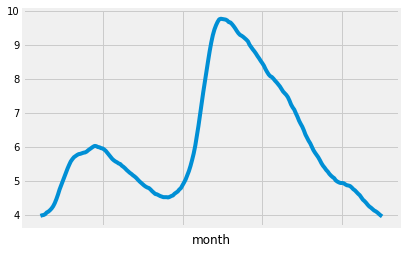

In [45]:
# Generate rolling average, plot, and display last 12.
rmean = rolling.mean()
rmean.plot()
rmean.tail(12)

month
2017-11    4.8
2017-12    4.8
2018-01    4.7
2018-02    4.5
2018-03    4.4
2018-04    4.4
2018-05    4.4
2018-06    4.4
2018-07    4.4
2018-08    4.2
2018-09    4.1
2018-10    4.1
Name: unemployment_rate, dtype: float64

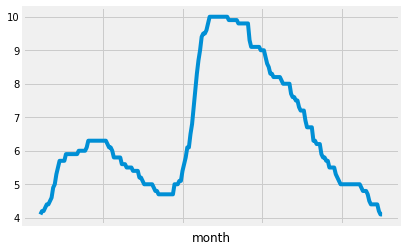

In [46]:
# Generate rolling max, plot, and display last 12.
rmax = rolling.max()
rmax.plot()
rmax.tail(12)

In [47]:
# Write rolling 12 month mean to CSV
rmean.to_csv('./data/rolling.csv')